<a href="https://colab.research.google.com/github/sysiphe0/exercise_ml/blob/main/SVM_KNN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 참고(출처) : Carl's Tech Bolg (https://wotres.tistory.com/)

## SVM

In [1]:
from sklearn import svm
X = [[0,0], [1,1]]
y = [0,1]
# kernel
clf = svm.SVC(kernel = 'linear')
clf.fit(X,y)
clf.predict([[2.,2.]])

array([1])

## KNN (간단)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0,1,2], [1,3,5], [1,10,10], [1,2,2], [1,3,4], [2,7,8], [3,3,10]]
y = [0,0,1,0,0,1,1]

# 유클리디안방식
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)

In [4]:
knn.fit(X,y)
test_x = [[1,2,3],[1,9,9]]
test_y = [0,1]
knn.predict(test_x)

array([0, 1])

In [6]:
import numpy as np
# k에 따른 정확도
k = np.arange(1,8)[::2]
k

array([1, 3, 5, 7])

In [7]:
acc = []
for i in k:
  knn = KNeighborsClassifier(n_neighbors=1).fit(X,y)
  acc.append(knn.score(test_x, test_y))

for i,j in zip(k,acc):
  print('k가 '+str(i)+'일때 정확도는 '+str(j))

k가 1일때 정확도는 1.0
k가 3일때 정확도는 1.0
k가 5일때 정확도는 1.0
k가 7일때 정확도는 1.0


## KNN 실제예제

In [20]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer_data = load_breast_cancer()
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [21]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [23]:
scaler.fit(df_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
df_data = pd.DataFrame(scaler.transform(df_data), columns=breast_cancer_data.feature_names)

In [27]:
from sklearn.model_selection import train_test_split

train_X, test_x, train_y, test_y = train_test_split(df_data, df_labels, test_size=0.2, random_state=0)

In [29]:
print(len(train_X), len(train_y), len(test_x), len(test_y))

455 455 114 114


In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [31]:
classifier.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
print(classifier.score(test_x, test_y))

0.9649122807017544


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

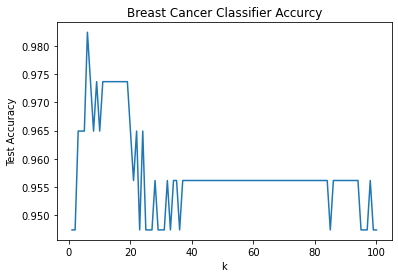

In [35]:
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(train_X, train_y)
  accuracies.append(classifier.score(test_x, test_y))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Breast Cancer Classifier Accurcy")
plt.show()